# Fitzhugh-Nagumo Work-Precision Diagrams

https://benchmarks.juliadiffeq.org/html/NonStiffODE/FitzhughNagumo_wpd.html
http://www.scholarpedia.org/article/FitzHugh-Nagumo_model

The purpose of this is to see how the errors scale on a standard nonlinear problem.

In [1]:
using OrdinaryDiffEq, ParameterizedFunctions, ODE, ODEInterface,
      ODEInterfaceDiffEq, LSODA, Sundials, DiffEqDevTools

In [2]:
using Plots; gr()

Plots.GRBackend()

In [3]:
f = @ode_def FitzhughNagumo begin
  dv = v - v^3/3 -w + l
  dw = τinv*(v +  a - b*w)
end a b τinv l

(::FitzhughNagumo{var"#7#11",var"#8#12",var"#9#13",Nothing,Nothing,var"#10#14",Expr,Expr}) (generic function with 2 methods)

In [4]:
p = [0.7,0.8,1/12.5,0.5]
prob = ODEProblem(f,[1.0;1.0],(0.0,10.0),p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

In [5]:
abstols = 1.0 ./ 10.0 .^ (6:13)
reltols = 1.0 ./ 10.0 .^ (3:10);

sol = solve(prob,Vern7(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol)

retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: nothing
u: nothing

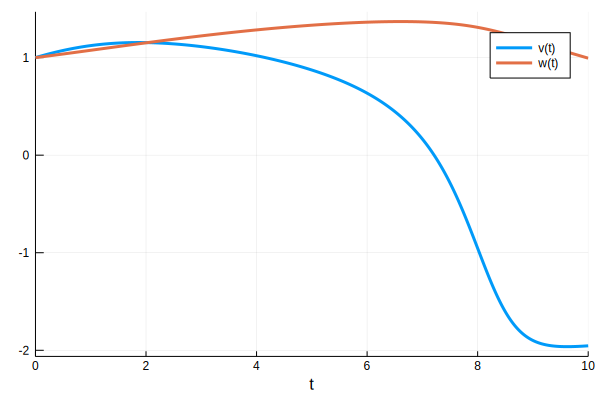

In [6]:
plot(sol)

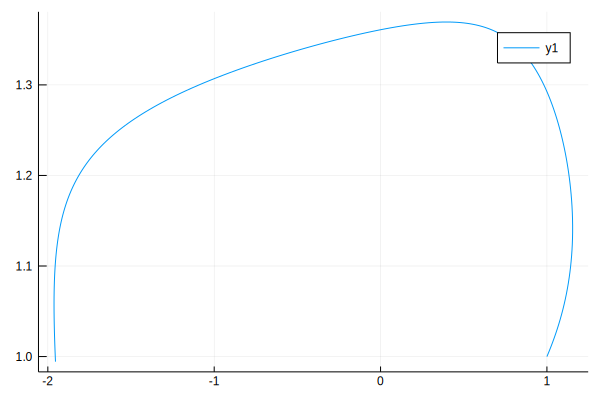

In [7]:
plot(getindex.(sol.u,1), getindex.(sol.u,2))